# Finance Data Project 

In this project i'll do an exploratory data analysis of stock prices. Keep in mind, this project is just meant just for fun, it is not meant to be a robust financial analysis or be taken as financial advice.
____

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

We will use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports

### The Imports

In [32]:
#from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

BAC = data.DataReader("BAC", 'google', start, end)

### NOTE: google finance is no longer supported by  pandas datareader. Hence, I'll be using a pickle file of all the data already filled instead. 

We'll read the data first from the pickle file and save it to a data file. 

In [88]:
df = pd.read_pickle('all_banks') 

Let us see how the data looks like

In [90]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

Let's create a list of the ticker symbols (as strings) in alphabetical order. 

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

# EDA

Let's explore the data a bit! 

** What is the max Close price for each bank's stock throughout the time period?**

In [9]:
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [18]:
returns=pd.DataFrame()

In [19]:
for tick in tickers:
    returns[tick+' return']=df[tick]['Close'].pct_change()

In [20]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Let's make a pairplot of the returns dataframe.**

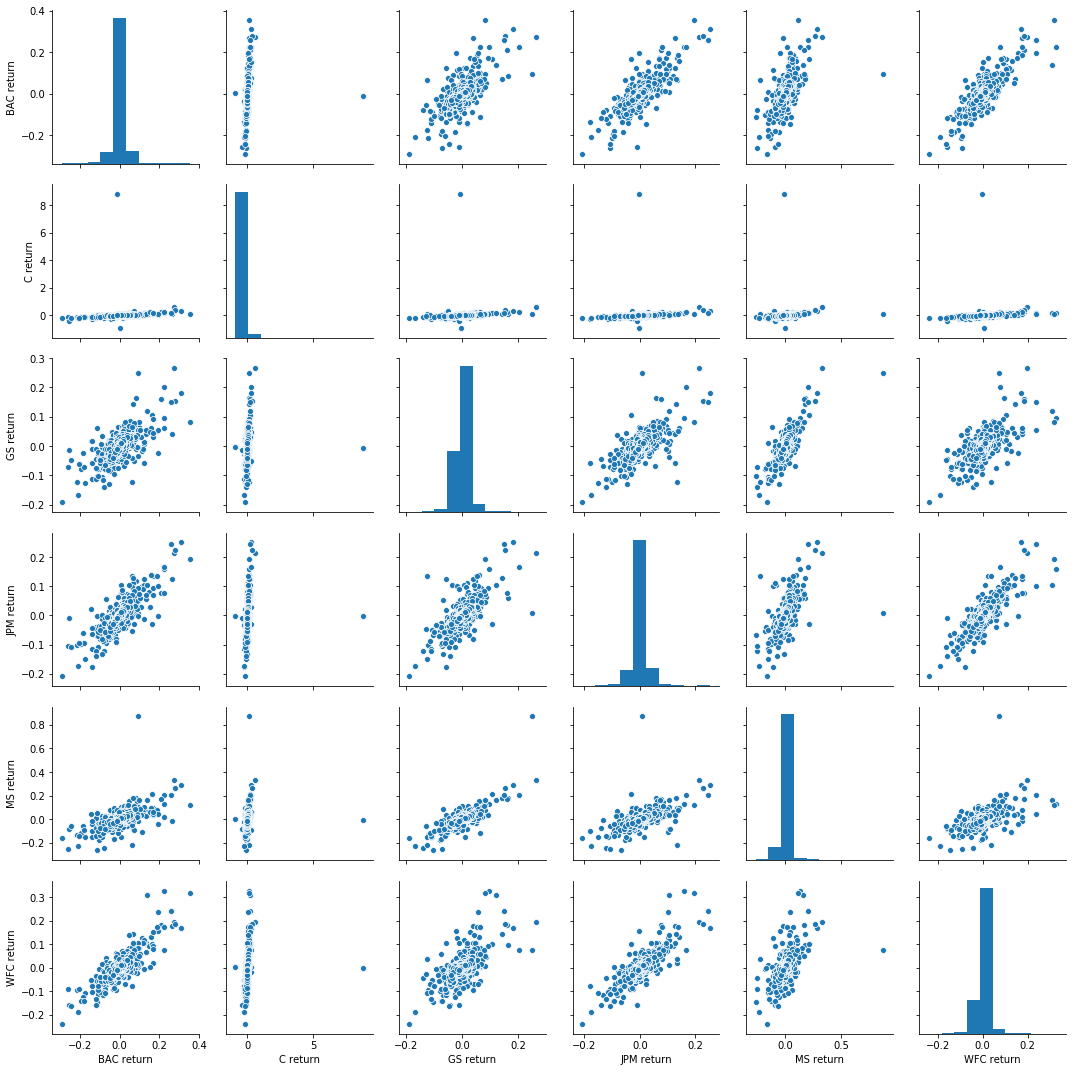

In [21]:
sns.pairplot(returns)

Background on [Citigroup's Stock Crash available here.]

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. It seems that 4 of the banks share the same day for the worst drop, [did anything significant happen that day?](https://www.investopedia.com/ask/answers/101314/where-was-dow-jones-when-obama-took-office.asp)**

In [22]:
returns.idxmin()

BAC return   2009-01-20
C return     2011-05-06
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** It can be seen that Citigroup's largest drop and biggest gain were very close to one another **
[That is because City Group had a stock split](https://www.citigroup.com/citi/news/2011/110509a.htm)

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns**

In [91]:
returns.std()

BAC return    0.036650
C return      0.179969
GS return     0.025346
JPM return    0.027656
MS return     0.037820
WFC return    0.030233
dtype: float64

Looks like Citi Group was indeed the riskiest one.

In [28]:
returns.ix['2015-01-01':'2015-12-31'].std()

c:\users\c58868\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

** Creating a distplot using of the 2015 returns for Morgan Stanley **

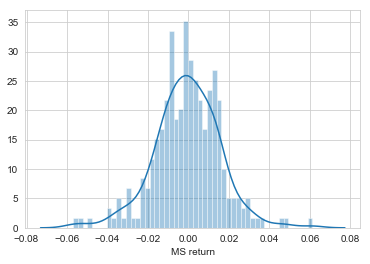

In [34]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MS return'],bins=50)

** Creating a distplot of the 2008 returns for CitiGroup **

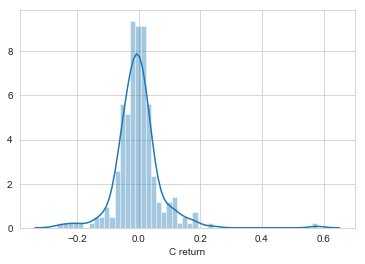

In [39]:
sns.distplot(returns['2008-01-01':'2008-12-31']['C return'],bins=50)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Creating a line plot showing Close price for each bank for the entire index of time. **

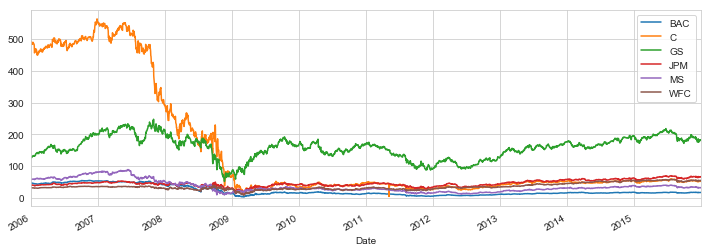

In [60]:
for tick in tickers:
    data=df[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

c:\users\c58868\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

c:\users\c58868\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



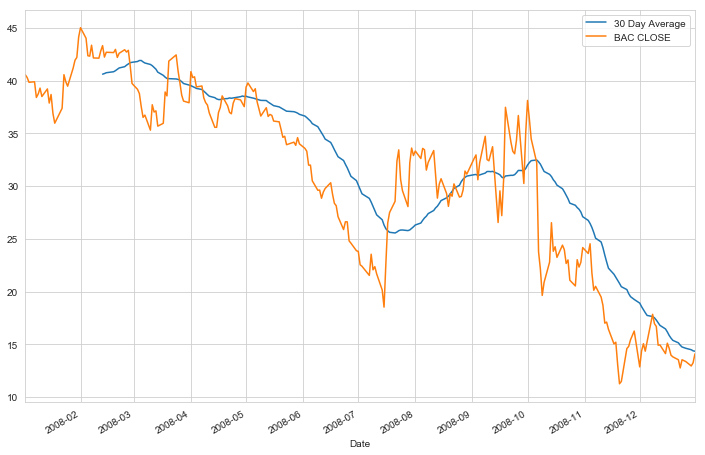

In [85]:
plt.figure(figsize=(12,8))
df['BAC']['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Average')
df['BAC']['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Creating a heatmap and a clustermap of the correlation between the stocks Close Price.**

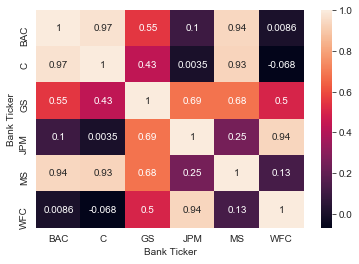

In [74]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

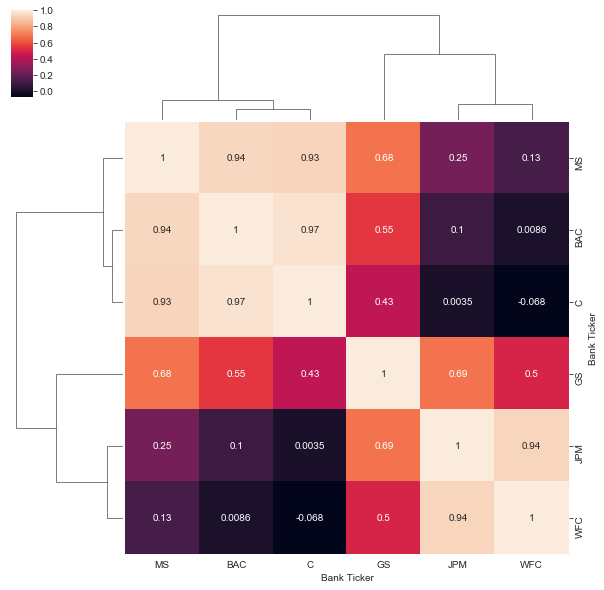

In [76]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Creating a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [80]:
df['BAC'].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

c:\users\c58868\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



** Creating a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [86]:
df['MS'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma')

c:\users\c58868\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



**Creating a Bollinger Band Plot for Bank of America for the year 2015.**

In [87]:
df['BAC'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

c:\users\c58868\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

